# Limpeza e Tratamento de Dados

### Analise


In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

dataset = pd.read_csv("E:/Geral/CienciaDeDados/src/10.Prática em Python/dados/Churn.csv",sep=";")

dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]

dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

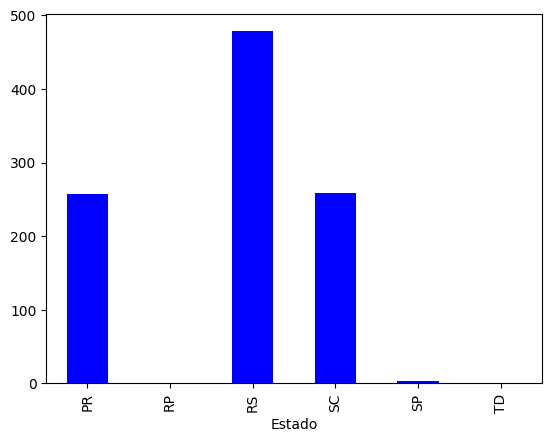

In [8]:
agrupado.plot.bar(color='blue')

<Axes: xlabel='Genero'>

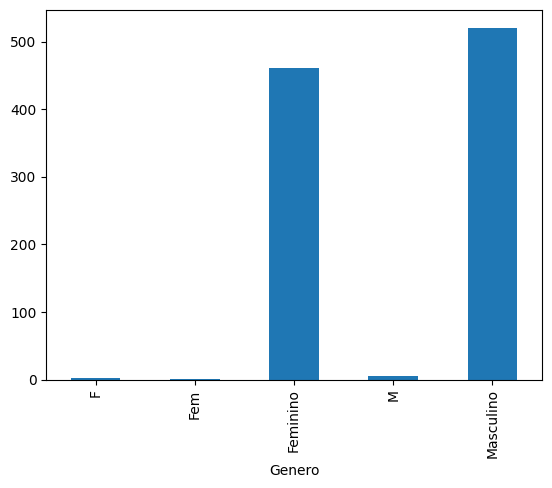

In [11]:
agrupado = dataset.groupby(['Genero']).size()
agrupado.plot.bar()

In [13]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

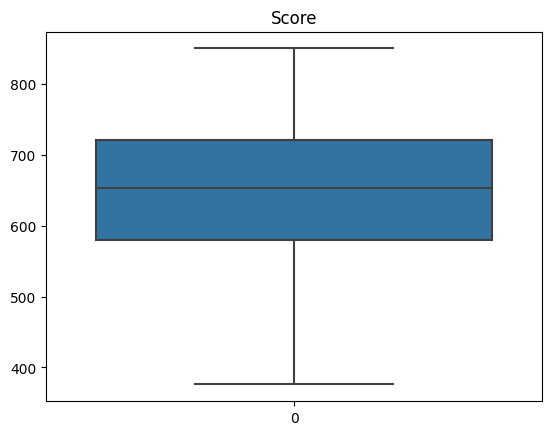

In [15]:
srn.boxplot(dataset['Score']).set_title('Score')

C:\Users\Gaspar\AppData\Local\Temp\ipykernel_11028\4068248596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

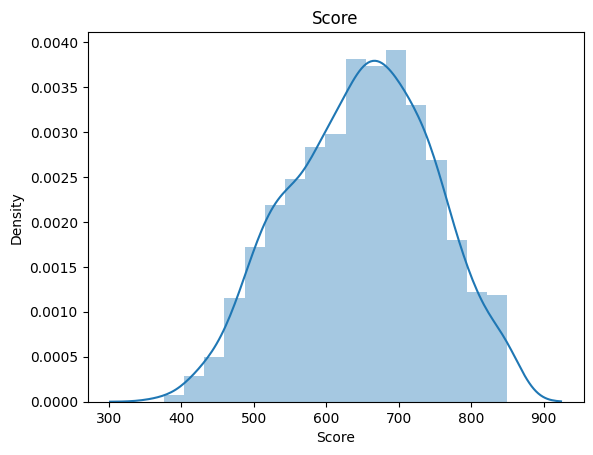

In [20]:
srn.distplot(dataset['Score']).set_title('Score')

#Esse vai sair, vai virar Displot ou Histplot

In [21]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

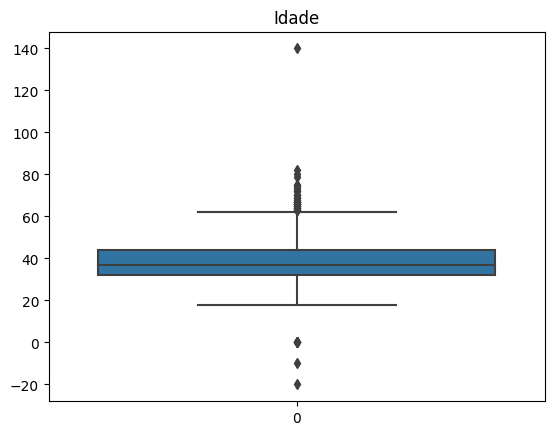

In [22]:
srn.boxplot(dataset['Idade']).set_title("Idade")

C:\Users\Gaspar\AppData\Local\Temp\ipykernel_11028\3896536365.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Idade'])


<Axes: xlabel='Idade', ylabel='Density'>

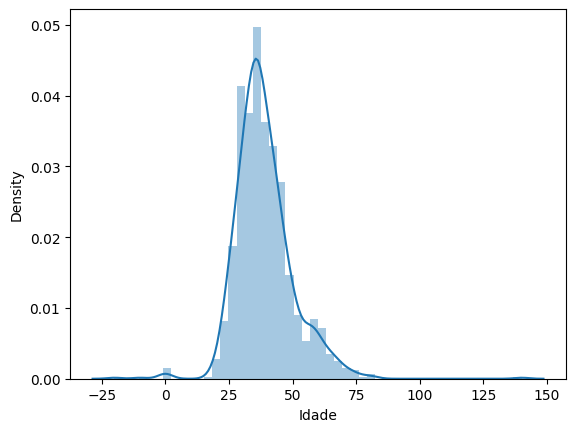

In [23]:
srn.distplot(dataset['Idade'])

### Tratamento


In [28]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [26]:
mediana = sts.median(dataset['Salario'])

dataset['Salario'].fillna(mediana,inplace=True)

dataset['Salario'].isnull().sum()

0

In [30]:
#Genero preenche com a Moda

dataset["Genero"].fillna("Masculino",inplace=True)
dataset['Genero'].isnull().sum()

0

In [31]:
dataset.loc[dataset['Genero'] == 'M','Genero'] = 'Masculino'

dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = "Feminino"

agrupado = dataset.groupby(['Genero']).size()
agrupado



Genero
Feminino     464
Masculino    535
dtype: int64

In [34]:
dataset.loc[(dataset['Idade']< 0) |(dataset['Idade']> 120) ]

mediana = sts.median(dataset['Idade'])

dataset.loc[(dataset['Idade']< 0) |(dataset['Idade']> 120), 'Idade' ] = mediana

In [35]:
dataset.loc[(dataset['Idade']< 0) |(dataset['Idade']> 120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [39]:
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [38]:
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

In [46]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [45]:
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']),'Estado'] = "RS"

In [47]:
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [48]:
desv = sts.stdev(dataset['Salario'])

In [49]:
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [50]:
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [51]:
dataset.loc[dataset['Salario'] >= 2 * desv,'Salario'] = mediana
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
